In [83]:
library(corrplot)
options(jupyter.plot_mimetypes = "image/png")
library(xtable)
library(ggplot2)

In [84]:
datadir = '../data_meta_analysis/'

In [85]:
data = read.csv(paste("../data_meta_analysis/data_derived_meta_analysis/X_region1_2_md.csv"))
head(data)

,ACC,IFGop_L,IFGop_R,Insula_L,Insula_R,MFG_L,MFG_R,MFGorb_L,MFGorb_R,PrecG_L,PrecG_R,Outside_MD
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0


In [86]:
colnames(data)

[1] "ACC"        "IFGop_L"    "IFGop_R"    "Insula_L"   "Insula_R"  
 [6] "MFG_L"      "MFG_R"      "MFGorb_L"   "MFGorb_R"   "PrecG_L"   
[11] "PrecG_R"    "Outside_MD"

In [87]:
X = t(as.matrix(data))


In [88]:
rowSums(X)
#print(xtable(data.frame(rowSums(X))),type='latex')

ACC    IFGop_L    IFGop_R   Insula_L   Insula_R      MFG_L      MFG_R 
       144         57         89         65         81        109         95 
  MFGorb_L   MFGorb_R    PrecG_L    PrecG_R Outside_MD 
        65         68        112        123        357

In [89]:
d=data.frame(x=colSums(X))
options(repr.plot.width=6, repr.plot.height=6)
#ggplot(aes(x=x),data=d)+geom_histogram()+xlab('Regions')+ggtitle('How many regions is each observation assigned to')

In [90]:
which(colSums(X)==0)

integer(0)

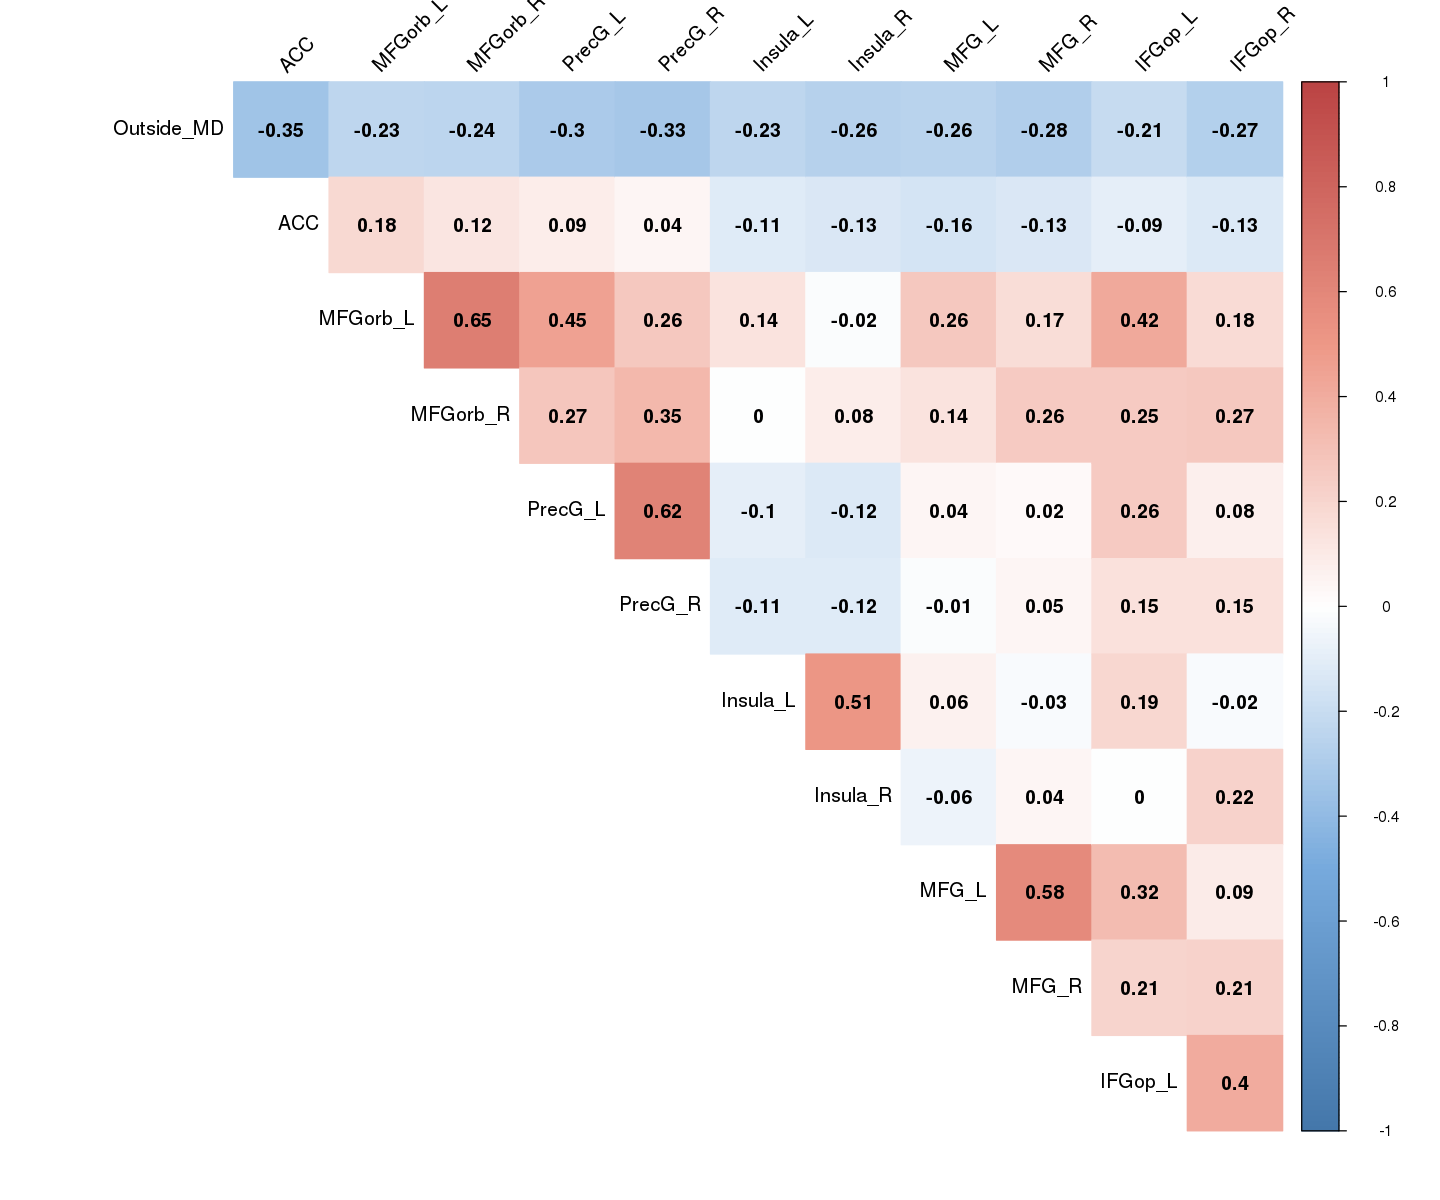

In [91]:
C = cor(t(X))
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
col <- colorRampPalette(c("#4477AA", "#77AADD", "#FFFFFF","#EE9988", "#BB4444"))
options(repr.plot.width=12, repr.plot.height=10)
corrplot(C, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


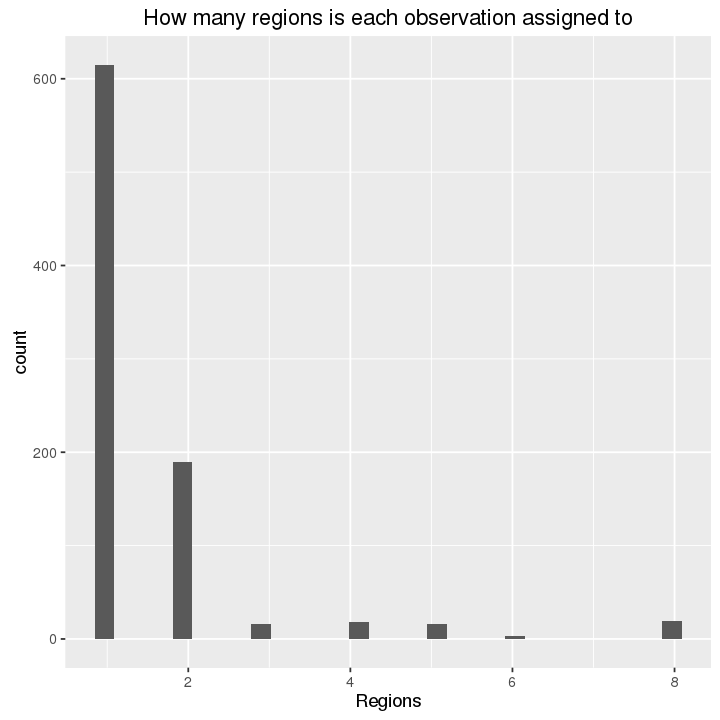

In [92]:
d=data.frame(x=colSums(X))
options(repr.plot.width=6, repr.plot.height=6)
ggplot(aes(x=x),data=d)+geom_histogram()+xlab('Regions')+ggtitle('How many regions is each observation assigned to')

 Percent of analyses assigned to 1, 2 or more regions

In [93]:
print(sum(colSums(X)==1)/ncol(X))
print(sum(colSums(X)==2)/ncol(X))
print(sum(colSums(X)>2)/ncol(X))

[1] 0.7012543
[1] 0.2166477
[1] 0.08209806


## Creating Bi-Lateral Regressors for left and right 

In [94]:
Xt<-data.frame(t(X))
# exclude all studies contributing more than 2
#Xt=data.frame(Xt[rowSums(Xt)<3,])

# set the rows with 2 or more to be 0
Xtt = Xt
for (row in seq(nrow(Xt))){
    Xrow<-Xt[row,]
    if (sum(Xrow,na.rm =TRUE)==2){
        newreg<-paste(colnames(Xt)[Xrow==1],collapse='+')
        Xtt[row,Xrow==1]=0 # set other columns to 1
        Xtt[row,newreg]=1 # set the new combined regressor to be equal to 1
        #Xt[!row,newreg]=0

    }
    
}
Xtt[is.na(Xtt)]=0

#paste(colnames(Xt)[Xt2[1,]==1],collapse='+')

In [95]:
colnames(Xtt)

[1] "ACC"                "IFGop_L"            "IFGop_R"           
 [4] "Insula_L"           "Insula_R"           "MFG_L"             
 [7] "MFG_R"              "MFGorb_L"           "MFGorb_R"          
[10] "PrecG_L"            "PrecG_R"            "Outside_MD"        
[13] "Insula_L+Insula_R"  "MFG_L+MFG_R"        "IFGop_R+PrecG_R"   
[16] "IFGop_R+Insula_R"   "MFGorb_L+MFGorb_R"  "PrecG_L+PrecG_R"   
[19] "IFGop_L+IFGop_R"    "ACC+PrecG_L"        "ACC+PrecG_R"       
[22] "IFGop_L+Insula_L"   "Insula_L+MFGorb_L"  "Insula_R+MFGorb_R" 
[25] "IFGop_L+PrecG_L"    "Insula_R+MFG_R"     "ACC+Outside_MD"    
[28] "PrecG_L+Outside_MD" "MFG_L+Outside_MD"

dropping regions assigned to 2 ROIs that are not L and R counterparts. 

In [96]:
dropping<-c('MFG_L+Outside_MD','MFG_R+Outside_MD',
            'ACC+Outside_MD','PrecG_L+Outside',
            'Insula_L+MFGorb_L','Insula_R+MFGorb_R',
           'IFGop_L+PrecG_L','Insula_R+MFG_R','ACC+PrecG_R',
           'IFGop_L+Insula_L','ACC+PrecG_L','PrecG_L+Outside_MD',
           'IFGop_R+PrecG_R','IFGop_R+Insula_R')
Xtt<-Xtt[ , -which(colnames(Xtt) %in% dropping)]
colnames(Xtt)

[1] "ACC"               "IFGop_L"           "IFGop_R"          
 [4] "Insula_L"          "Insula_R"          "MFG_L"            
 [7] "MFG_R"             "MFGorb_L"          "MFGorb_R"         
[10] "PrecG_L"           "PrecG_R"           "Outside_MD"       
[13] "Insula_L+Insula_R" "MFG_L+MFG_R"       "MFGorb_L+MFGorb_R"
[16] "PrecG_L+PrecG_R"   "IFGop_L+IFGop_R"

In [97]:
#colnames(Xtt)

In [98]:
# removing rows with 2+ assignments still 
# I wait until the regression to actually do this. 
test = Xtt[rowSums(Xtt)==1,]
nrow(test)/ncol(X)


[1] 0.8643101

In [99]:
write.csv(Xtt,'../data_meta_analysis/data_derived_meta_analysis/X_region1_combined_regs_md.csv',row.names=FALSE)

In [100]:
C=cor(Xtt)
#C

In [101]:
head(test)

,ACC,IFGop_L,IFGop_R,Insula_L,Insula_R,MFG_L,MFG_R,MFGorb_L,MFGorb_R,PrecG_L,PrecG_R,Outside_MD,Insula_L+Insula_R,MFG_L+MFG_R,MFGorb_L+MFGorb_R,PrecG_L+PrecG_R,IFGop_L+IFGop_R
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
C = cor(test)
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
col <- colorRampPalette(c("#4477AA", "#77AADD", "#FFFFFF","#EE9988", "#BB4444"))
options(repr.plot.width=20, repr.plot.height=20)
corrplot(C, method="color", col=col(200),  
         type="upper", order="hclust", 
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black", tl.srt=45, #Text label color and rotation
         # Combine with significance
         # hide correlation coefficient on the principal diagonal
         diag=FALSE 
         )

Warning message:
In cor(test): the standard deviation is zero

ERROR: Error in hclust(as.dist(1 - corr), method = hclust.method): NA/NaN/Inf in foreign function call (arg 11)
